# Explonatory Data Analisys - Call Center Performance
# Álvaro Sánchez Martín

In [1]:
#Importaciones
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as numpy
import pandas as pd
import seaborn as sns

In [2]:
# Colores personalizados para las gráficas
colors = ["#f87456", "#d9f1cf", "#c1c5ef", "#e6edfe", "#ffc9e0", "#ffffff"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#d9f1cf", "#c1c5ef"])

## 1-Entendimiento de los datos

In [3]:
#Carga del dataset
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/EDA_Entrega/src/data/Call Center.csv")

#Visualización del dataset
df

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/05/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/04/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA
...,...,...,...,...,...,...,...,...,...,...,...,...
32936,BRM-96715111-h-155613-wO,Othelia Ouldcott,Neutral,NaN,10/30/2020,Billing Question,Oklahoma City,Oklahoma,Web,Within SLA,13,Denver/CO
32937,UJH-96531654-y-074703-H4,Tasha Cubbinelli,Negative,NaN,10/07/2020,Billing Question,Crawfordsville,Indiana,Chatbot,Within SLA,42,Baltimore/MD
32938,WDS-58440679-I-064360-TT,Margaux Slaten,Negative,NaN,10/04/2020,Billing Question,Lehigh Acres,Florida,Chatbot,Within SLA,30,Baltimore/MD
32939,FTZ-87704815-T-824288-iC,Odey Seed,Positive,8.0,10/27/2020,Payments,Salt Lake City,Utah,Call-Center,Within SLA,38,Baltimore/MD


In [4]:
#Exploración de las columnas y de valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        32941 non-null  object 
 1   customer_name             32941 non-null  object 
 2   sentiment                 32941 non-null  object 
 3   csat_score                12271 non-null  float64
 4   call_timestamp            32941 non-null  object 
 5   reason                    32941 non-null  object 
 6   city                      32941 non-null  object 
 7   state                     32941 non-null  object 
 8   channel                   32941 non-null  object 
 9   response_time             32941 non-null  object 
 10  call duration in minutes  32941 non-null  int64  
 11  call_center               32941 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

id                              0
customer_name                   0
sentiment                       0
csat_score                  20670
call_timestamp                  0
reason                          0
city                            0
state                           0
channel                         0
response_time                   0
call duration in minutes        0
call_center                     0
dtype: int64

# Tabla de Variables

| Variable                  | Tipo de Dato   | Descripción                                                                 |
|---------------------------|----------------|-----------------------------------------------------------------------------|
| `id`                     | String         | Identificador único del contacto.                                            |
| `customer_name`          | String         | Nombre del cliente que realizó el contacto.                                  |
| `sentiment`              | Categórico     | Sentimiento del cliente hacia el servicio (`Very Positive`,`Negative`,etc ). |
| `csat_score`             | Numérico       | Puntuación de la satisfacción del cliente (1-10).                            |
| `call_timestamp`         | Fecha/Datetime | Fecha en la que se realizó el contacto.                                      |
| `reason`                 | Categórico     | Razón del contacto (`Billing Question`, `Payments`, etc.).                |
| `city`                   | String         | Ciudad desde donde llamó el cliente.                                       |
| `state`                  | String         | Estado desde donde llamó el cliente.                                       |
| `channel`                | Categórico     | Canal utilizado para el contacto (`Call-Center`, `Chatbot`, etc.).          |
| `response_time`          | Categórico     | Tiempo de respuesta (`Within SLA`, `Above SLA`).                           |
| `call duration in minutes` | Numérico       | Duración de la llamada en minutos.                                         |
| `call_center`            | String         | Centro de llamadas que gestionó el contacto.                                |

***Se observa que solo hay nulos en la columna "csat_score" lo cual es lógico ya que no todos los clientes tienden a valorar el contacto.***
***Aún así, disponemos de la columna "sentiment" que está relacionada con la satisfacción del cliente, por lo que la usaremos para rellenar la columna de CSAT con la media de los valores de "sentiment".***

# LIMPIEZA DE DATOS

In [6]:
#Conversión a formato datetime de la columna "call_timestamp"
df["call_timestamp"] = pd.to_datetime(df["call_timestamp"], format="%m/%d/%Y")
df = df.sort_values(by="call_timestamp")

In [7]:
#Eliminación la columna "id" ya que para este análisis no es necesaria
df = df.drop(columns = "id")

In [8]:
#Agrupación de los valores de "sentiment" en categorías más generales
sentiment_map = {
    "Very Negative": "Negativo",
    "Negative": "Negativo",
    "Neutral": "Neutral",
    "Positive": "Positivo",
    "Very Positive": "Positivo"
}
df["general_sentiment"] = df["sentiment"].map(sentiment_map)

#Orden lógico de "sentiment"
sentiment_order = ["Negativo", "Neutral", "Positivo"]
df["general_sentiment"] = pd.Categorical(df["general_sentiment"], categories=sentiment_order, ordered=True)

# ANÁLISIS
## Análisis univariante

In [9]:
columnas = ["reason","channel", "call_center"]

for columna in columnas:
    print(f"\nFrecuencias para la columna '{columna}':")
    
    # Frecuencia absoluta
    frecuencia_absoluta = df[columna].value_counts()
    print("Frecuencia Absoluta:")
    print(frecuencia_absoluta)
    
    # Frecuencia relativa
    frecuencia_relativa = df[columna].value_counts(normalize=True) * 100
    print("\nFrecuencia Relativa (%):")
    print(frecuencia_relativa)


Frecuencias para la columna 'reason':
Frecuencia Absoluta:
reason
Billing Question    23462
Payments             4749
Service Outage       4730
Name: count, dtype: int64

Frecuencia Relativa (%):
reason
Billing Question    71.224310
Payments            14.416684
Service Outage      14.359005
Name: proportion, dtype: float64

Frecuencias para la columna 'channel':
Frecuencia Absoluta:
channel
Call-Center    10639
Chatbot         8256
Email           7470
Web             6576
Name: count, dtype: int64

Frecuencia Relativa (%):
channel
Call-Center    32.297137
Chatbot        25.062991
Email          22.676907
Web            19.962964
Name: proportion, dtype: float64

Frecuencias para la columna 'call_center':
Frecuencia Absoluta:
call_center
Los Angeles/CA    13734
Baltimore/MD      11012
Chicago/IL         5419
Denver/CO          2776
Name: count, dtype: int64

Frecuencia Relativa (%):
call_center
Los Angeles/CA    41.692723
Baltimore/MD      33.429465
Chicago/IL        16.450624
Denver

*El motivo más común de contacto es Billing Question, representando más del 70% de los casos.*
Esto indica que una gran parte de los clientes tienen dudas o problemas relacionados con facturación.


Los motivos relacionados con Payments e Service Outage están casi igualados, aunque representan un porcentaje mucho menor (~14% cada uno).


*El canal más utilizado es el Call-Center (32.30%), seguido por Chatbot (25.06%).* 
Esto refleja que los clientes aún prefieren interactuar con agentes humanos, aunque los canales digitales están ganando relevancia.


Los canales Email y Web tienen una participación más baja pero aún significativa, mostrando que una proporción considerable de clientes opta por métodos asincrónicos para comunicarse.


*El centro de llamadas de Los Angeles/CA maneja el mayor volumen de contactos (41.69%), seguido de Baltimore/MD (33.43%).*
Esto sugiere que estos centros tienen mayor capacidad o reciben mayor carga de trabajo.

# ANÁLISIS BIVARIANTE

### "reason" vs. "sentiment"

<Figure size 1200x600 with 0 Axes>

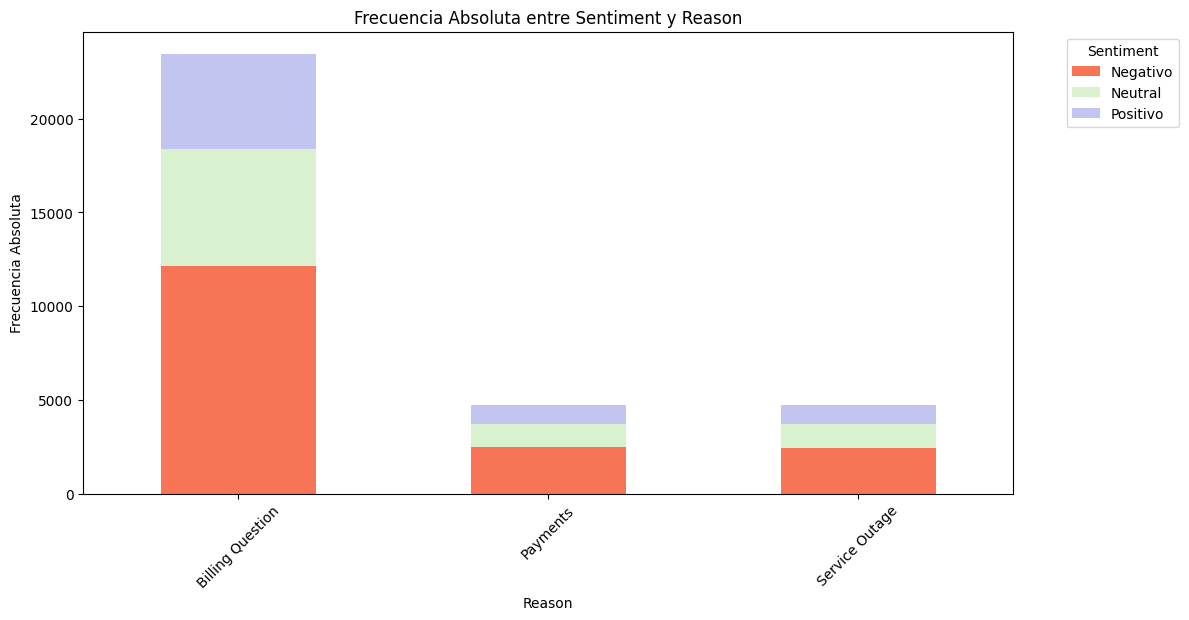

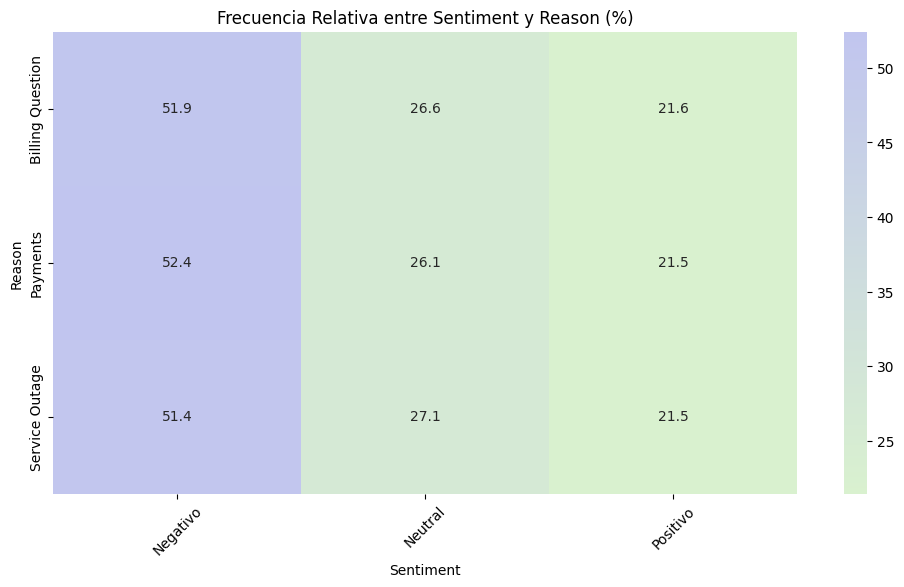

In [10]:
sentiment_reason_absolute = pd.crosstab(df["reason"], df["general_sentiment"])
sentiment_reason_relative = pd.crosstab(df["reason"], df["general_sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
sentiment_reason_absolute[sentiment_order].plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(sentiment_reason_absolute.columns)])
plt.title("Frecuencia Absoluta entre Sentiment y Reason")
plt.xlabel("Reason")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_reason_relative[sentiment_order], annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Sentiment y Reason (%)")
plt.xlabel("Sentiment")
plt.ylabel("Reason")
plt.xticks(rotation=45)
plt.show()

#### Conclusión:
Las razones como "Payments" tienen mayores valores negativos, mientras que "Billing questions" está asociado con valoraciones positivas.

### "sentiment" vs. "channel"

<Figure size 1200x600 with 0 Axes>

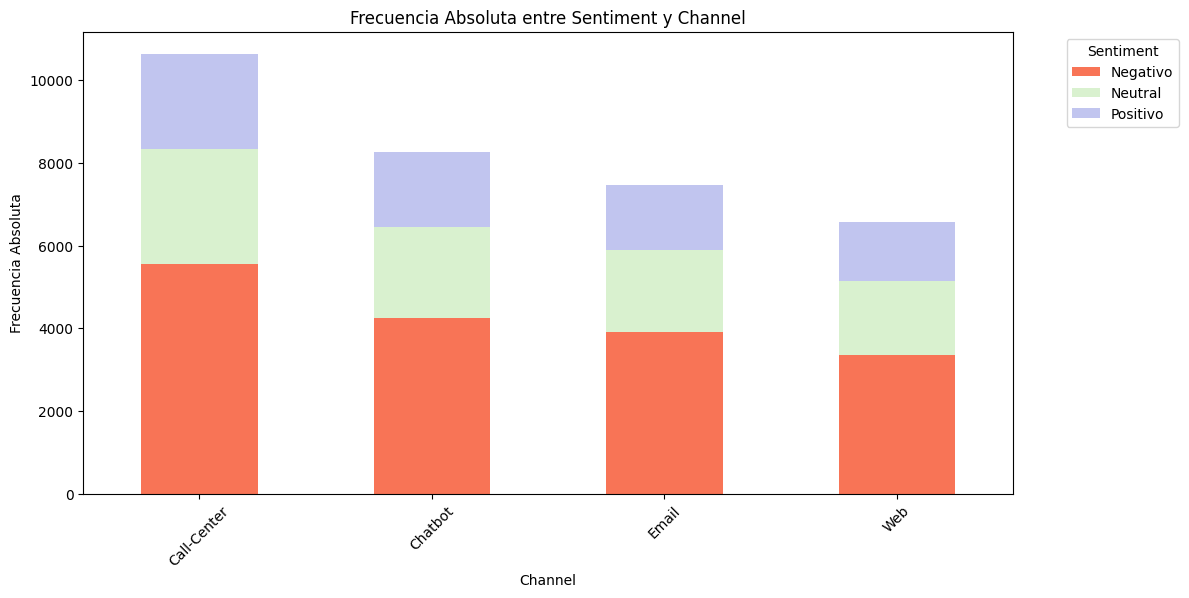

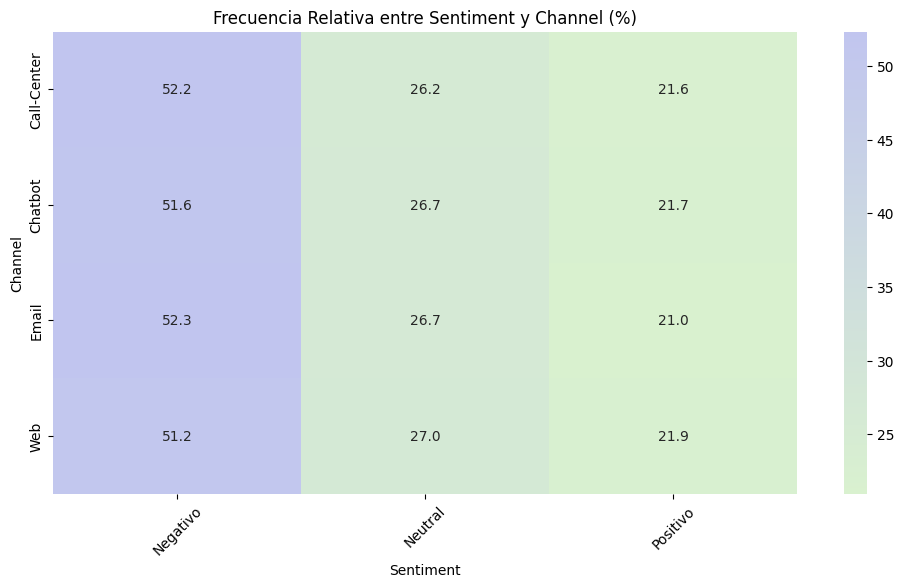

In [11]:
sentiment_channel_absolute = pd.crosstab(df["channel"], df["general_sentiment"])
sentiment_channel_relative = pd.crosstab(df["channel"], df["general_sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
sentiment_channel_absolute[sentiment_order].plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(sentiment_order)])
plt.title("Frecuencia Absoluta entre Sentiment y Channel")
plt.xlabel("Channel")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_channel_relative[sentiment_order], annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Sentiment y Channel (%)")
plt.xlabel("Sentiment")
plt.ylabel("Channel")
plt.xticks(rotation=45)
plt.show()

#### Conclusión:
 El canal "Email" y "Call-Center" tienen mayor proporción de valoraciones negativas, mientras que "Web" y "Chatbot" tienen más positivas.


 Lo cual nos da una idea de que los clientes están sintiendo frustación con los agentes, lo cual indica que puede que haya un problema de training y conocimiento en estos.


 También nos puede dar una idea de que la automatización de respuestas está siendo muy bien recibida por los clientes.

### "sentiment" vs. "call_center"

<Figure size 1200x600 with 0 Axes>

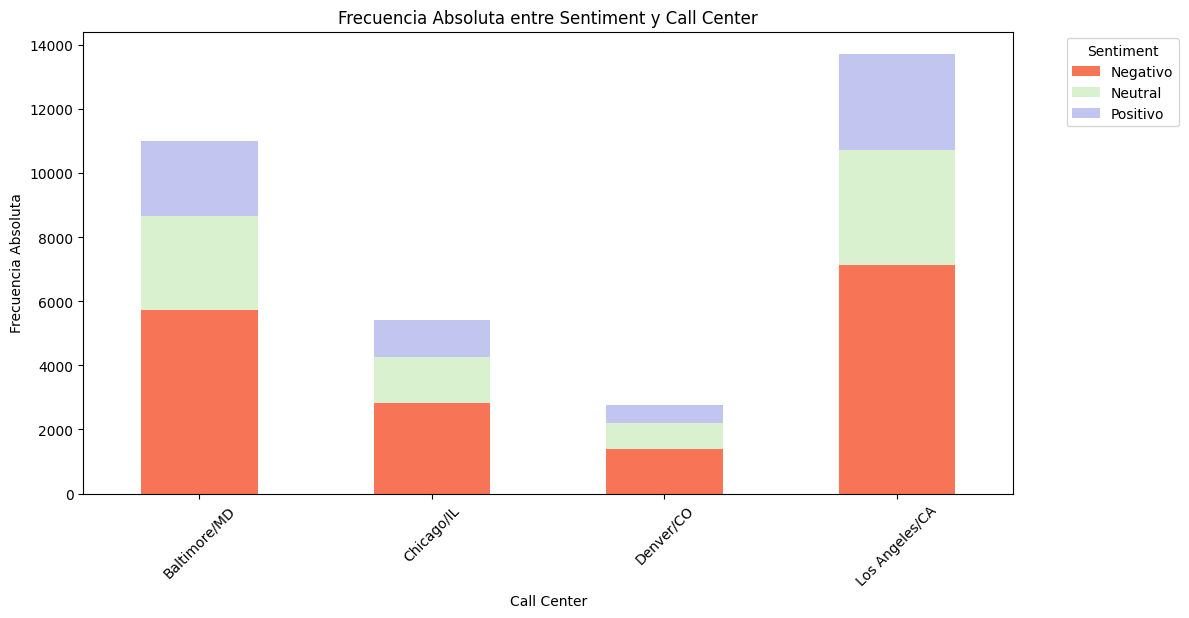

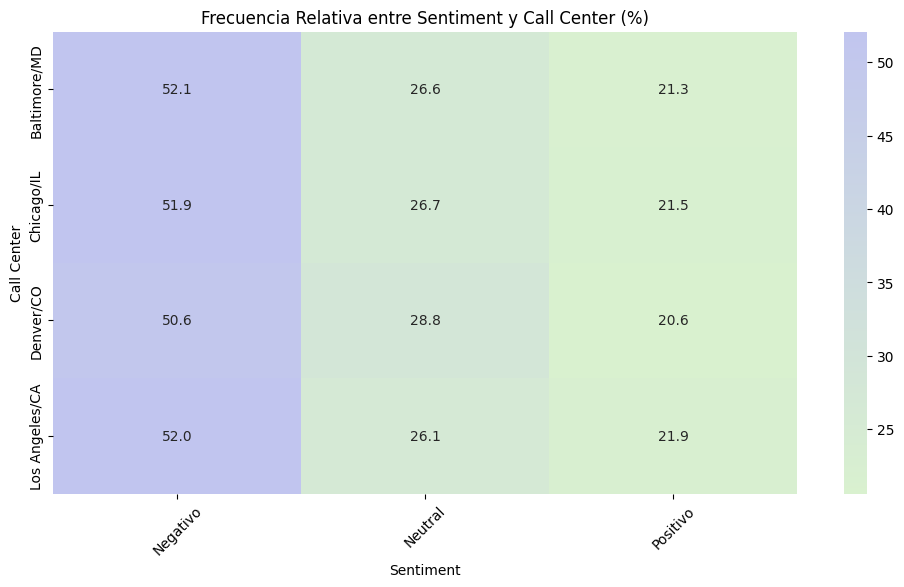

In [12]:
sentiment_call_center_absolute = pd.crosstab(df["call_center"], df["general_sentiment"])
sentiment_call_center_relative = pd.crosstab(df["call_center"], df["general_sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
sentiment_call_center_absolute[sentiment_order].plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(sentiment_order)])
plt.title("Frecuencia Absoluta entre Sentiment y Call Center")
plt.xlabel("Call Center")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_call_center_relative[sentiment_order], annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Sentiment y Call Center (%)")
plt.xlabel("Sentiment")
plt.ylabel("Call Center")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

El centro de "Los Angeles/CA" tienen mayor proporción de valoraciones positivas, mientras que "Baltimore/MD" muestra una mayor proporción de negativos.

Nos puede dar una idea de que los agentes de "Los Angeles/CA" estén mejor entrenados y tengan mejor conocimiento, ya que a pesar de tener más volumen de contactos,

mantienen una mejor satisfacción de los clientes.


### "reason" vs. "channel"

<Figure size 1200x600 with 0 Axes>

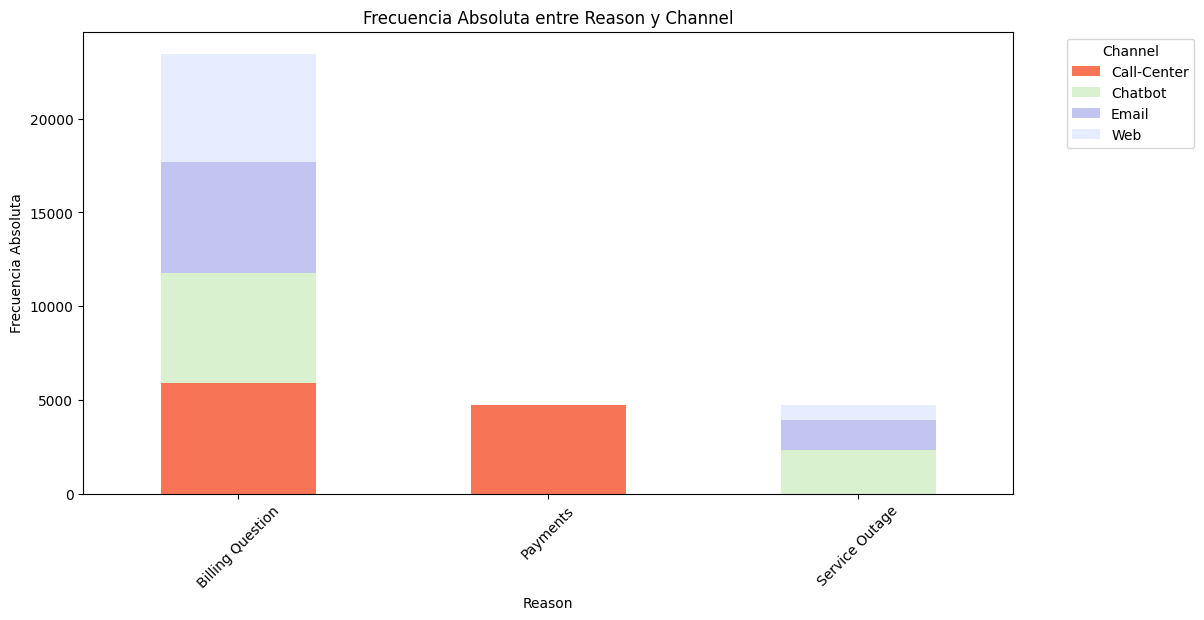

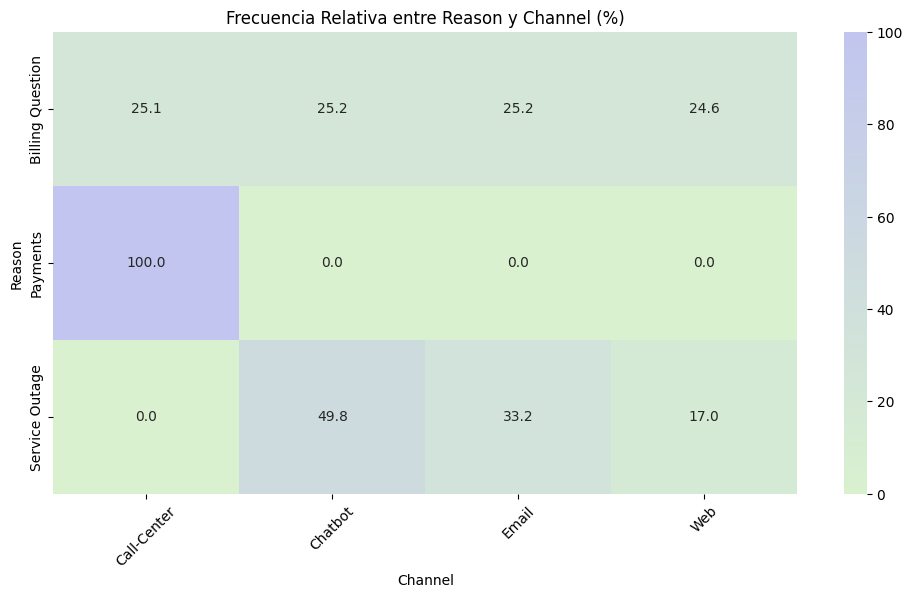

In [13]:
reason_channel_absolute = pd.crosstab(df["reason"], df["channel"])
reason_channel_relative = pd.crosstab(df["reason"], df["channel"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
reason_channel_absolute.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(reason_channel_absolute.columns)])
plt.title("Frecuencia Absoluta entre Reason y Channel")
plt.xlabel("Reason")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(reason_channel_relative, annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Reason y Channel (%)")
plt.xlabel("Channel")
plt.ylabel("Reason")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

Podemos ver que todos los contactos relacionados con pagos se hacen a traves de llamadas.


Por otro lado los de interrupción de servicio poro todos los canales menos el de llamadas.

### "reason" vs. "call_center"

<Figure size 1200x600 with 0 Axes>

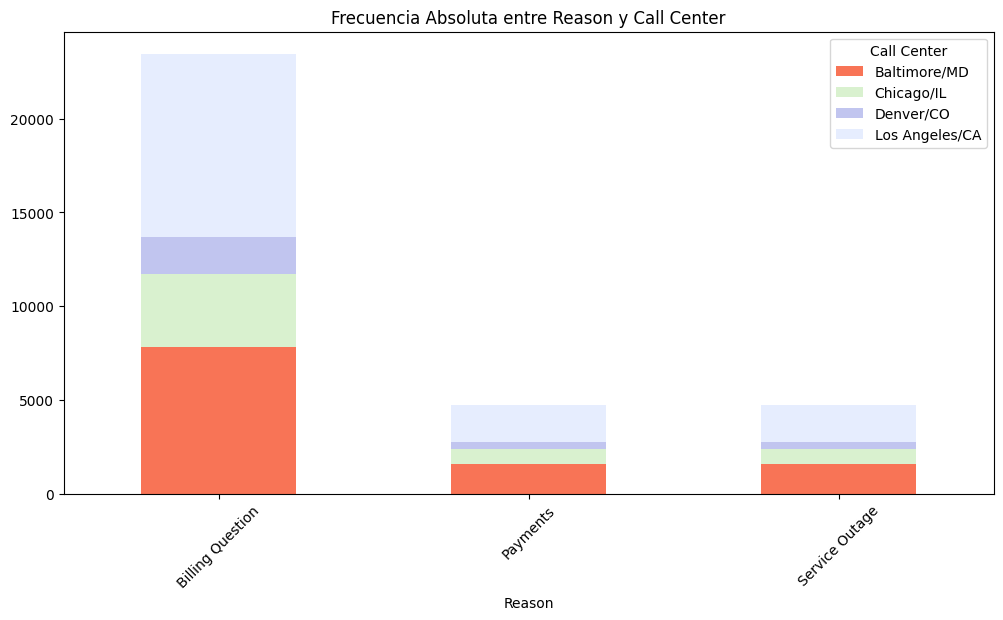

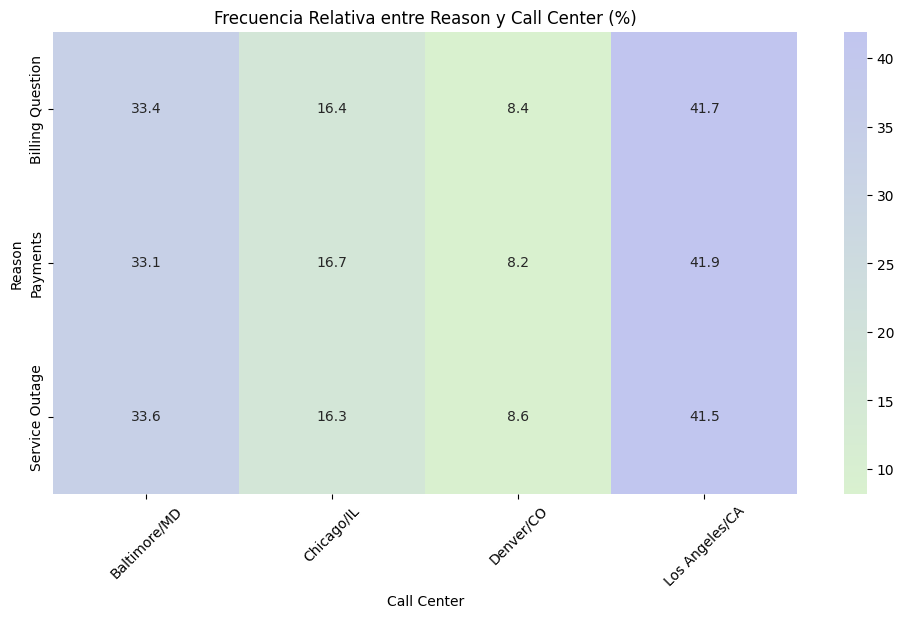

In [14]:
reason_call_center_absolute = pd.crosstab(df["reason"], df["call_center"])
reason_call_center_relative = pd.crosstab(df["reason"], df["call_center"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
reason_call_center_absolute.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(reason_call_center_absolute.columns)])
plt.title("Frecuencia Absoluta entre Reason y Call Center")
plt.xlabel("Reason")
plt.xticks(rotation=45)
plt.legend(title="Call Center", bbox_to_anchor=(1, 1), loc="upper right")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(reason_call_center_relative, annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Reason y Call Center (%)")
plt.xlabel("Call Center")
plt.ylabel("Reason")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

El centro de los Angeles tiene mayor representación de contactos respecto a los otros.

### "sentiment" vs. "call_center"

<Figure size 1000x600 with 0 Axes>

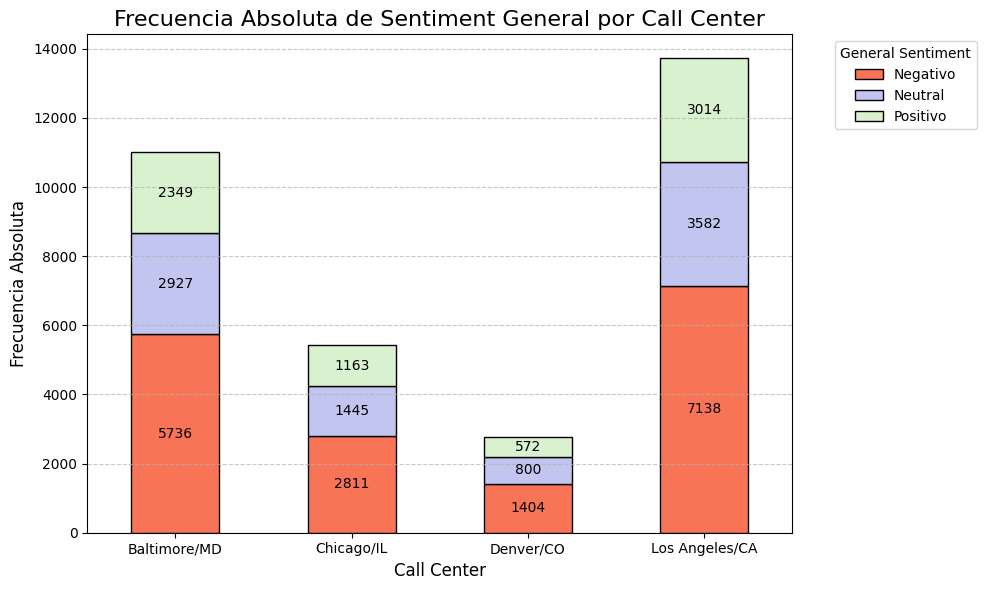

<Figure size 1000x600 with 0 Axes>

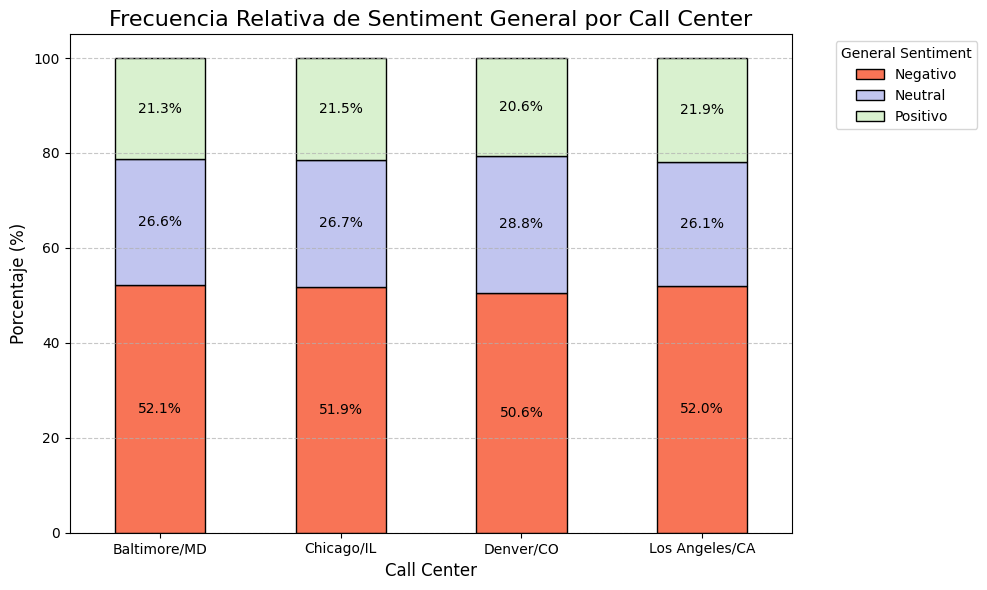

In [15]:
# Calcular las frecuencias absolutas por Call Center y Sentiment General
absolute_data = pd.crosstab(df["call_center"], df["general_sentiment"])

# Calcular las frecuencias relativas por Call Center y Sentiment General
relative_data = pd.crosstab(df["call_center"], df["general_sentiment"], normalize="index") * 100

# Ordenar las columnas para mantener la lógica de los sentimientos
absolute_data = absolute_data[["Negativo", "Neutral", "Positivo"]]
relative_data = relative_data[["Negativo", "Neutral", "Positivo"]]

# Función para añadir números en las barras
def add_bar_labels(ax, data):
    for p in ax.patches:
        value = p.get_height()
        if value > 0:  # Mostrar solo valores mayores a 0
            ax.annotate(
                f"{value:.0f}" if data.equals(absolute_data) else f"{value:.1f}%",  # Mostrar porcentaje o entero
                (p.get_x() + p.get_width() / 2., p.get_y() + value / 2),
                ha="center", va="center", fontsize=10, color="black"
            )

# Gráfico de barras apiladas (Frecuencia Absoluta)
plt.figure(figsize=(10, 6))
ax_abs = absolute_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#f87456", "#c1c5ef", "#d9f1cf"],
    edgecolor="black"
)
add_bar_labels(ax_abs, absolute_data)
plt.title("Frecuencia Absoluta de Sentiment General por Call Center", fontsize=16)
plt.xlabel("Call Center", fontsize=12)
plt.ylabel("Frecuencia Absoluta", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="General Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de barras apiladas (Frecuencia Relativa)
plt.figure(figsize=(10, 6))
ax_rel = relative_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#f87456", "#c1c5ef", "#d9f1cf"],
    edgecolor="black"
)
add_bar_labels(ax_rel, relative_data)
plt.title("Frecuencia Relativa de Sentiment General por Call Center", fontsize=16)
plt.xlabel("Call Center", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="General Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();


#### Conclusión

A pesar de recibir el mayor número de sentiment negativo, el call center de Los Angeles, se mantiene con el mejor porcentaje de sentiment positivo.
Lo cual indica, que a pesar del volumen de contactos, mantienen un buen servicio comparado con el resto, especialmente con el de Baltimore que obtiene los peores resultados.

#### "call_center" vs. "channel"

<Figure size 1200x600 with 0 Axes>

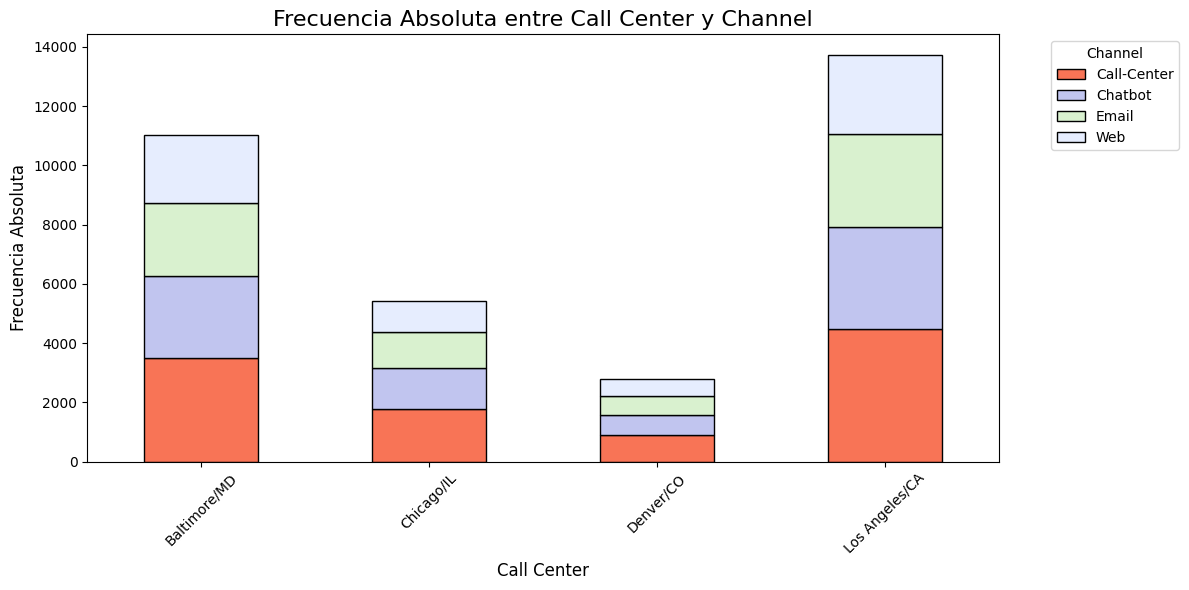

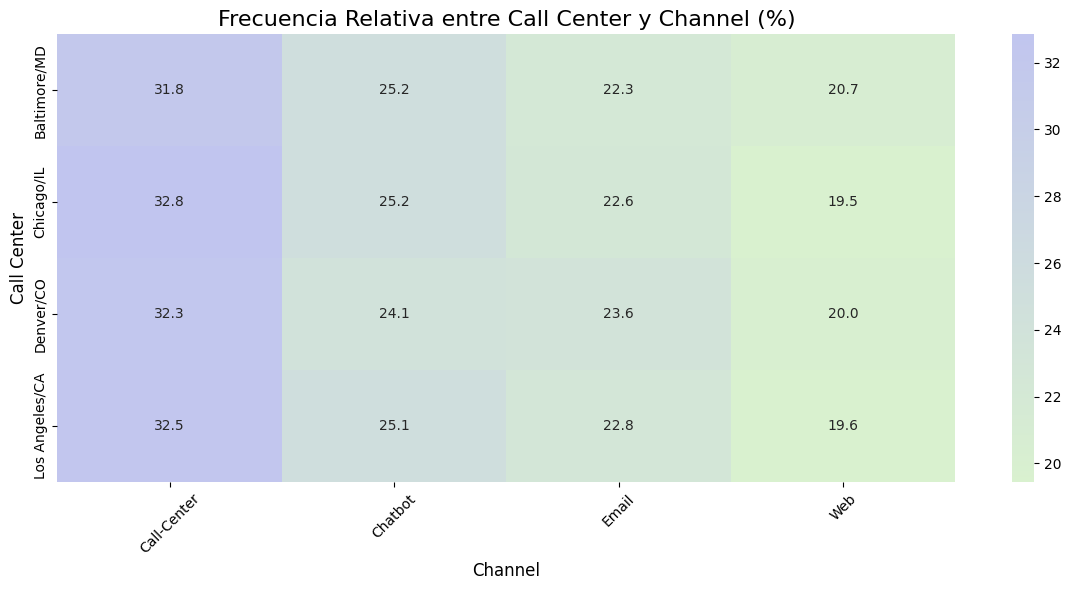

In [16]:
call_center_channel_absolute = pd.crosstab(df["call_center"], df["channel"])
call_center_channel_relative = pd.crosstab(df["call_center"], df["channel"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
call_center_channel_absolute.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["#f87456", "#c1c5ef", "#d9f1cf", "#e6edfe"],
    edgecolor="black"
)
plt.title("Frecuencia Absoluta entre Call Center y Channel", fontsize=16)
plt.xlabel("Call Center", fontsize=12)
plt.ylabel("Frecuencia Absoluta", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(
    call_center_channel_relative,
    annot=True,
    fmt=".1f",
    cmap=custom_cmap,
    cbar=True
)
plt.title("Frecuencia Relativa entre Call Center y Channel (%)", fontsize=16)
plt.xlabel("Channel", fontsize=12)
plt.ylabel("Call Center", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ANÁLISIS MULTIVARIANTE

Frecuencia Absoluta de Call Center:
call_center
Los Angeles/CA    13734
Baltimore/MD      11012
Chicago/IL         5419
Denver/CO          2776
Name: count, dtype: int64

Frecuencia Relativa de Call Center (%):
call_center
Los Angeles/CA    41.692723
Baltimore/MD      33.429465
Chicago/IL        16.450624
Denver/CO          8.427188
Name: proportion, dtype: float64


/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_35766/744230607.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


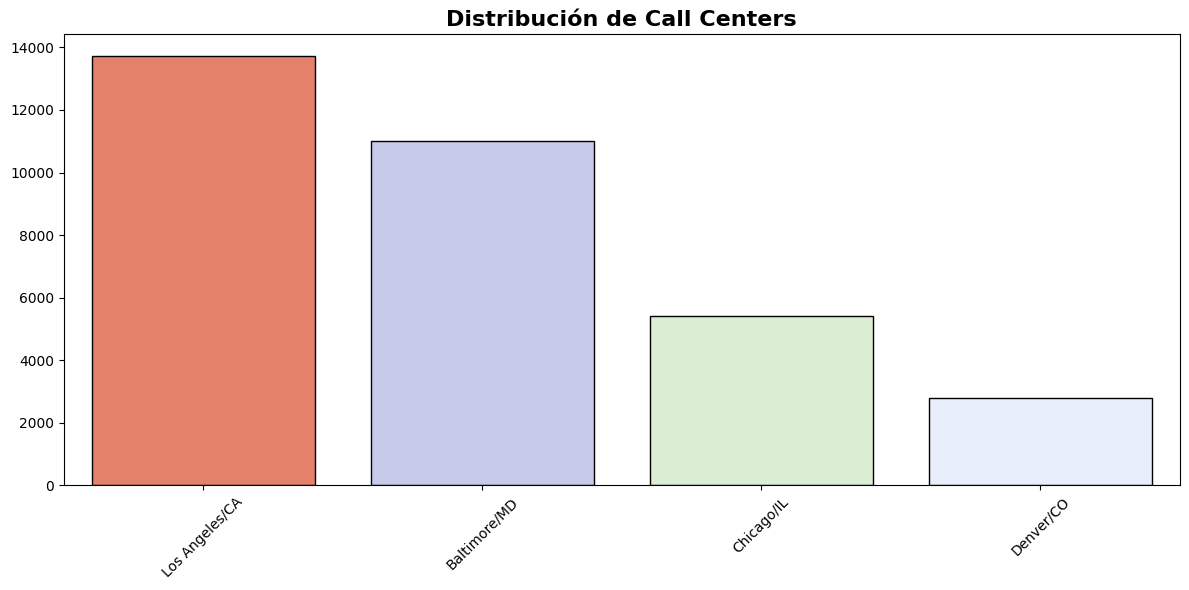

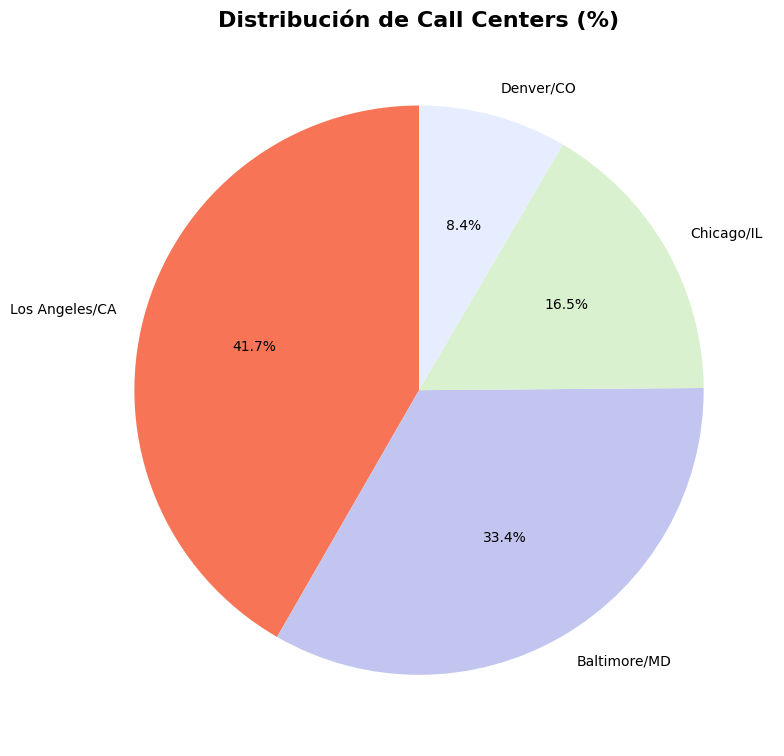

In [22]:
# Frecuencia absoluta y relativa
call_center_counts = df["call_center"].value_counts()
call_center_percent = df["call_center"].value_counts(normalize=True) * 100

# Mostrar resultados
print("Frecuencia Absoluta de Call Center:")
print(call_center_counts)
print("\nFrecuencia Relativa de Call Center (%):")
print(call_center_percent)

# Configuración de colores
colors = ["#f87456", "#c1c5ef", "#d9f1cf", "#e6edfe"]

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x=call_center_counts.index,
    y=call_center_counts.values,
    palette=colors,
    edgecolor="black"
)
plt.title("Distribución de Call Centers", fontsize=16, fontweight="bold")
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Mostrar nombres completos
plt.tight_layout()
plt.savefig("distribución_callcenters.png", dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    call_center_counts,
    labels=call_center_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    textprops={"fontsize": 10}  # Ajustar tamaño de texto
)
plt.title("Distribución de Call Centers (%)", fontsize=16, fontweight="bold")
plt.tight_layout()

# Mostrar el gráfico
plt.show()




Frecuencia Absoluta de Sentiment:
sentiment
Negative         11063
Neutral           8754
Very Negative     6026
Positive          3928
Very Positive     3170
Name: count, dtype: int64

Frecuencia Relativa de Sentiment (%):
sentiment
Negative         33.584287
Neutral          26.574785
Very Negative    18.293312
Positive         11.924350
Very Positive     9.623266
Name: proportion, dtype: float64


/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_35766/3042081434.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_35766/3042081434.py:16: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


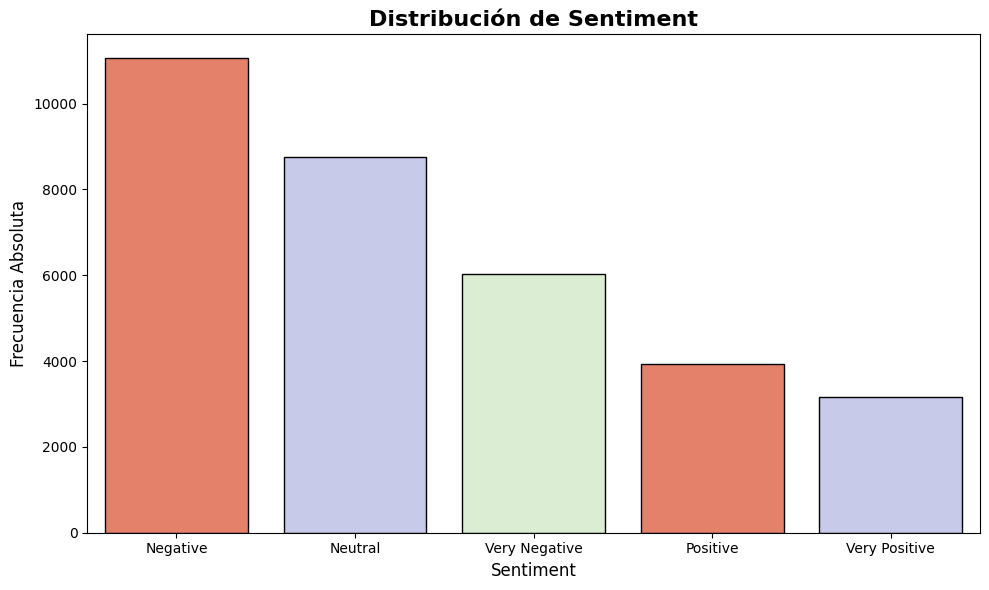

In [24]:

# Frecuencia absoluta y relativa
sentiment_counts = df["sentiment"].value_counts()
sentiment_percent = df["sentiment"].value_counts(normalize=True) * 100

# Mostrar resultados
print("Frecuencia Absoluta de Sentiment:")
print(sentiment_counts)
print("\nFrecuencia Relativa de Sentiment (%):")
print(sentiment_percent)

# Configuración de colores
colors = ["#f87456", "#c1c5ef", "#d9f1cf"]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=colors,
    edgecolor="black"
)
plt.title("Distribución de Sentiment", fontsize=16, fontweight="bold")
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Frecuencia Absoluta", fontsize=12)
plt.xticks(fontsize=10)  # Mostrar nombres completos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
